In [4]:
import sys
import os
sys.path.append(os.path.abspath("../"))

In [5]:
# importar  librerias y  frameworks necesarios
import pandas as pd
import numpy as  np
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# carga de modulos
from src.visualization.utils_viz import plot_count, boxplot_per_classes

In [6]:
# cargue de datos
data = pd.read_csv(r'C:\Users\dioct\OneDrive\Desktop\repos\demand_forcasting_and_promotions\Data\raw\data_xyz_foods.csv') 
# OBservar las primeras  5 filas del dataset 
data. head()

,Date,ProductID,StoreID,ProductName,Quantity,Price
0,2025-08-04,16a562fb5931,14bce06b5959,Pasta and Beans and Tandoori Masala,1.45,4.9
1,2025-08-26,16a562fb5931,b3815c950a50,Pasta and Beans and Tandoori Masala,1.45,4.9
2,2024-12-20,16a562fb5931,53fff28459d3,Pasta and Beans and Tandoori Masala,2.00,7.0
3,2025-04-08,2ab97e780325,8268a65fda4b,Pork belly buns and BBQ Seasoning,1.00,7.0
4,2025-04-23,2ab97e780325,024a0bfc4484,Pork belly buns and BBQ Seasoning,1.00,7.0


In [7]:
# Imprimir  información  base del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4602519 entries, 0 to 4602518
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Date         object 
 1   ProductID    object 
 2   StoreID      object 
 3   ProductName  object 
 4   Quantity     float64
 5   Price        float64
dtypes: float64(2), object(4)
memory usage: 210.7+ MB


In [8]:
# chequeo base  para  de cantidad de registros  que se tiene en el dataset
print(f'Cantidad de registros : {data.shape[0]} \nCantidad de columnas :{data.shape[1]}' )
print(f'Datos duplicados? : {data.duplicated().any()}')

Cantidad de registros : 4602519 
Cantidad de columnas :6
Datos duplicados? : True


In [9]:
# Check for negative values in 'imp_vta' and 'cant_vta'
negative_imp_vta = data[data['Price'] < 0].shape[0]
negative_cant_vta = data[data['Quantity'] < 0].shape[0]
print(f"\n Cantidad de valores negativos 'Price' : {negative_imp_vta}")
print(f"Cantidad de valores negativos  'Quantity' : {negative_cant_vta}")


 Cantidad de valores negativos 'Price' : 0
Cantidad de valores negativos  'Quantity' : 0


Validar la presencia de valores duplicados, para  identificar si son errores o no de digitación de información.

In [10]:
### descriptivas fundamentales por cada una de las  variables numericas
data.describe()

,Quantity,Price
count,4.602519e+06,4.602519e+06
mean,1.276002e+00,6.751285e+00
std,2.703701e+00,1.892588e+00
min,1.000000e+00,0.000000e+00
25%,1.000000e+00,5.000000e+00
50%,1.000000e+00,7.000000e+00
75%,1.450000e+00,8.000000e+00
max,9.367000e+02,4.100000e+01


In [11]:
## frecuencia  y cantidad de valores unicos en cada  variable categorica 
data.describe(exclude=[np.number])

,Date,ProductID,StoreID,ProductName
count,4602519,4602519,4602519,4602519
unique,517,17,67,17
top,2025-12-23,16a562fb5931,a15ff6df5d40,Pasta and Beans and Tandoori Masala
freq,20810,2692099,262497,2692099


In [12]:
print("\nnumero de  valores unicos por columna:")
for col in data.columns:
    print(f"columna '{col}': {data[col].nunique()} valores unicos") # Se itera por cada columna para identificar valores unicos por  variable

# ajuste de  variable  de fecha , pasar de tipo object a datatime para  un correcto uso en analisis.
data['Date'] = pd.to_datetime(data['Date'])
print("\n COlumna 'Date' se convierte a  tipo de dato datatime.")
print(data.info())


numero de  valores unicos por columna:
columna 'Date': 517 valores unicos
columna 'ProductID': 17 valores unicos
columna 'StoreID': 67 valores unicos
columna 'ProductName': 17 valores unicos
columna 'Quantity': 163 valores unicos
columna 'Price': 67 valores unicos

 COlumna 'Date' se convierte a  tipo de dato datatime.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4602519 entries, 0 to 4602518
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Date         datetime64[ns]
 1   ProductID    object        
 2   StoreID      object        
 3   ProductName  object        
 4   Quantity     float64       
 5   Price        float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 210.7+ MB
None


In [13]:
# Analizar  valores  nulos  en el conjunto de datos, esto permitira  identificar si es necesario aplicar metodos de missing-value handle

t = PrettyTable(['Nombre columna', 'cant. valores perdidos', '% valores perdidos'])
for column in data.columns:
    missing_count = len(data[column][data[column].isna()])
    missing_percentage = round(missing_count / len(data) * 100, 2)
    if missing_count > 0:
        #print(f'{column}: {missing_count} ({missing_percentage}%)')
        t.add_row([column,missing_count,f'{missing_percentage}%'])
print(t)   

+----------------+------------------------+--------------------+
| Nombre columna | cant. valores perdidos | % valores perdidos |
+----------------+------------------------+--------------------+
+----------------+------------------------+--------------------+


No se evidencio la presencia de  valores nulos dentro del conjunto de  datos, lo cual es importante en el momento de  analisis EDA

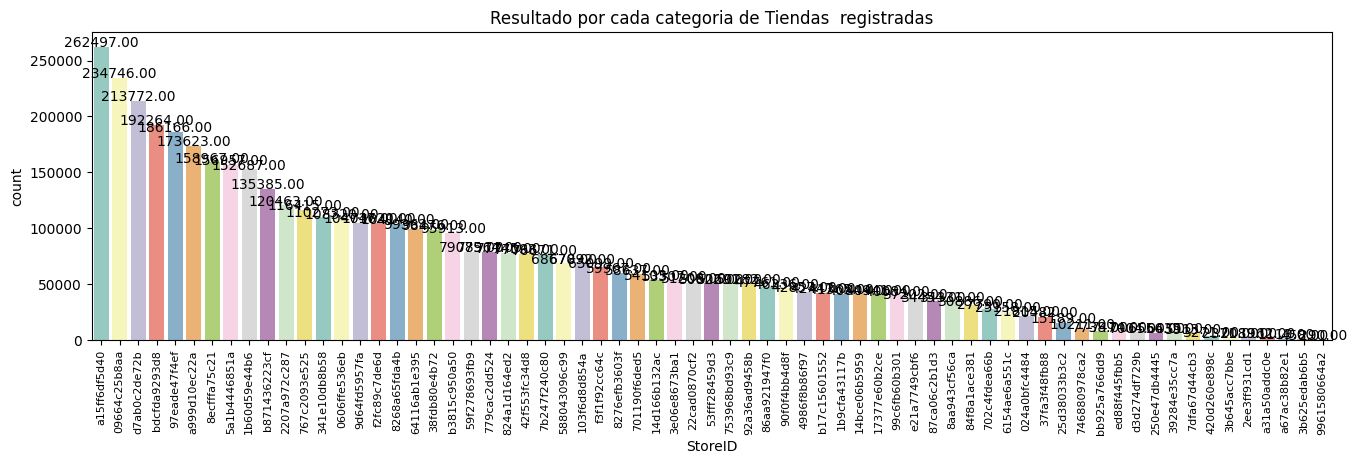

In [14]:
# grafico de  barras para identificar  las frecuencias de todas las tiendas presentes en los datos
plot_count('StoreID', 'Tiendas  registradas', data, size=4)

En la  grafica  anterior, se evidecia una fuerte presencia  de registros  asociados a multiples  tiendas,  lo cual puede indicar que los productos  generales  son distribuidos en multiples  plataformas  mercantiles. podria  influenciar analisis futuros para predicción de  promociones.

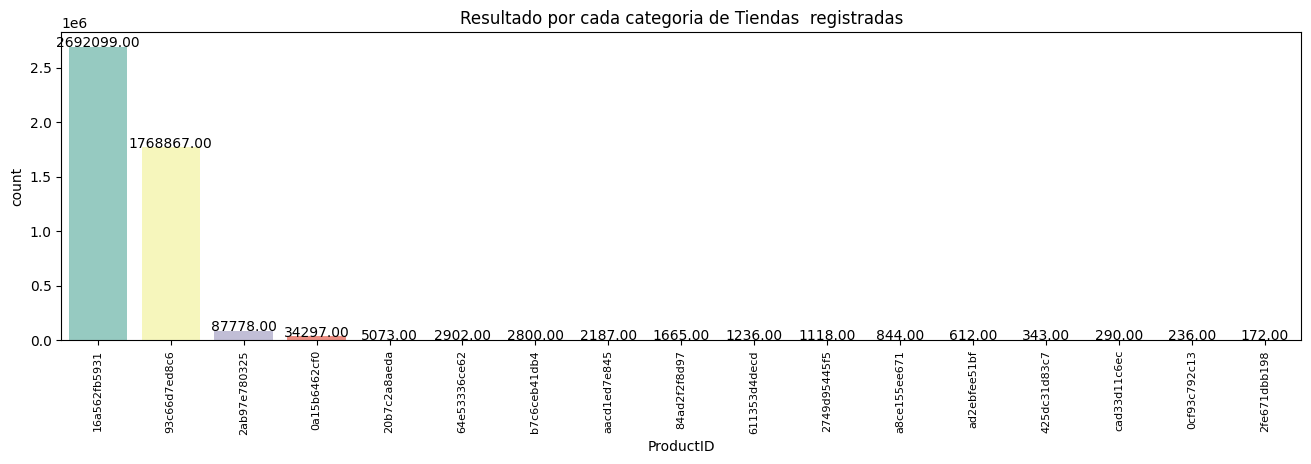

In [15]:
# grafico  de  freciencias  de los productos
plot_count('ProductID', 'Tiendas  registradas', data, size=4)

analizando la cantidad de productos  vendidos de forma  generalizada,  se evidencia que hay dos productos con la mayor particiáción en ventas,  esto implica  que  a nivel de  marca/ producto  hay un desvalanceo de  información.

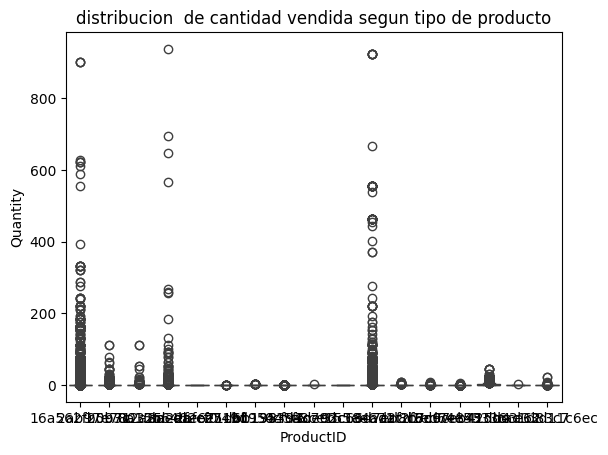

In [16]:
boxplot_per_classes(data, 'Quantity', 'ProductID' , 'distribucion  de cantidad vendida segun tipo de producto')

Se observa  una distribución  afectada por  posibles outlier a nivel distribucional  de las cantidades vendidas por cada tienda,Posiblemente  sea  procesos naturales sujetos  a  promociones  registradas  sobre  ciertos productos o temporadas  que impactaron de forma directa sobre  las ventas.

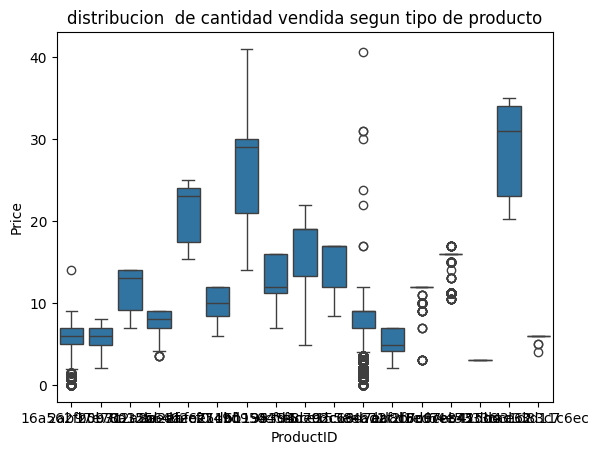

In [17]:
boxplot_per_classes(data, 'Price', 'ProductID' , 'distribucion  de cantidad vendida segun tipo de producto')

A nivel general se observa que el precio de venta sobre los prodcutos  tiene una variabilidad  muy notable ,  debido a que las distribuciones  por cada uno de los productos  registrados la información presenta asimetria. Se recomienda  validar los precios   vs  productos por cada una de las tiendas  registradas.

          Quantity     Price
Quantity  1.000000 -0.055193
Price    -0.055193  1.000000


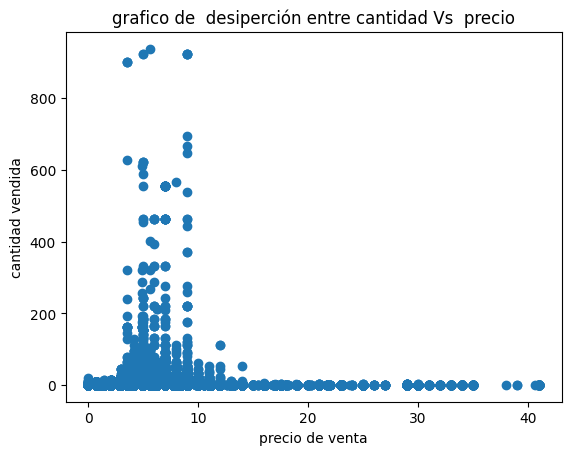

In [18]:

# idenitficar  la correlación entre precio  con cantidad
print(data[['Quantity', 'Price']].corr())

plt.scatter(data.Price, data.Quantity)
plt.xlabel('precio de venta')
plt.ylabel('cantidad vendida')
plt.title('grafico de  desiperción entre cantidad Vs  precio')
plt.show()

Se idenitifica  que las variables de precio y cantidad no presenta  una realción linealizable.  lo cual influje que se debe de  realizar  procesamiento y construcción de caracteristicas adicionales para identificar tendencias  promocionales dentro de cada uno de los productos y tiendas  registradas en la base de datos.

In [19]:
#  comprobar la informacipon de cero en 'Price' 
cero_contenido = data[data['Price'] == 0].shape[0]
print(f"\nCantidad de registros  que tienen  valor de precio 'cero': {cero_contenido}")
display(data[data['Price'] == 0])


Cantidad de registros  que tienen  valor de precio 'cero': 211


,Date,ProductID,StoreID,ProductName,Quantity,Price
10046,2025-02-02,93c66d7ed8c6,8aa943cf56ca,Chicken milanese and Peppercorns White,1.45,0.0
12454,2025-12-26,16a562fb5931,a15ff6df5d40,Pasta and Beans and Tandoori Masala,1.00,0.0
16923,2025-11-06,93c66d7ed8c6,37fa3f48fb88,Chicken milanese and Peppercorns White,1.00,0.0
26424,2025-12-14,16a562fb5931,59f278693fb9,Pasta and Beans and Tandoori Masala,1.00,0.0
42529,2025-12-13,16a562fb5931,a999d10ec22a,Pasta and Beans and Tandoori Masala,1.00,0.0
...,...,...,...,...,...,...
4491018,2025-02-02,93c66d7ed8c6,701190f6ded5,Chicken milanese and Peppercorns White,1.45,0.0
4507444,2025-08-03,93c66d7ed8c6,37fa3f48fb88,Chicken milanese and Peppercorns White,1.45,0.0
4511981,2024-08-29,93c66d7ed8c6,250e47db4445,Chicken milanese and Peppercorns White,1.45,0.0
4573532,2025-07-31,93c66d7ed8c6,753968bd93c9,Chicken milanese and Peppercorns White,1.45,0.0


Se recomienda  evaluar  las cantidades de productos  vendidos  por tienda  a precio cero, para idenitifcar si son posibles  promociones.

In [20]:
# analiziz  previo de  cantidades y precios  totales  sobre  las fechas registradas, esto permitira  identificar  picos generales  sobre las fechas
sales_over_time = data.groupby('Date')[['Quantity', 'Price']].sum()
sales_over_time

,Quantity,Price
Date,,
2024-08-01,5520.15,21035.0
2024-08-02,5459.25,20421.1
2024-08-03,3172.60,13703.9
2024-08-04,3342.25,14127.4
2024-08-05,3810.60,16655.1
...,...,...
2025-12-27,8100.00,41747.0
2025-12-28,9326.00,47447.0
2025-12-29,11263.00,57978.0


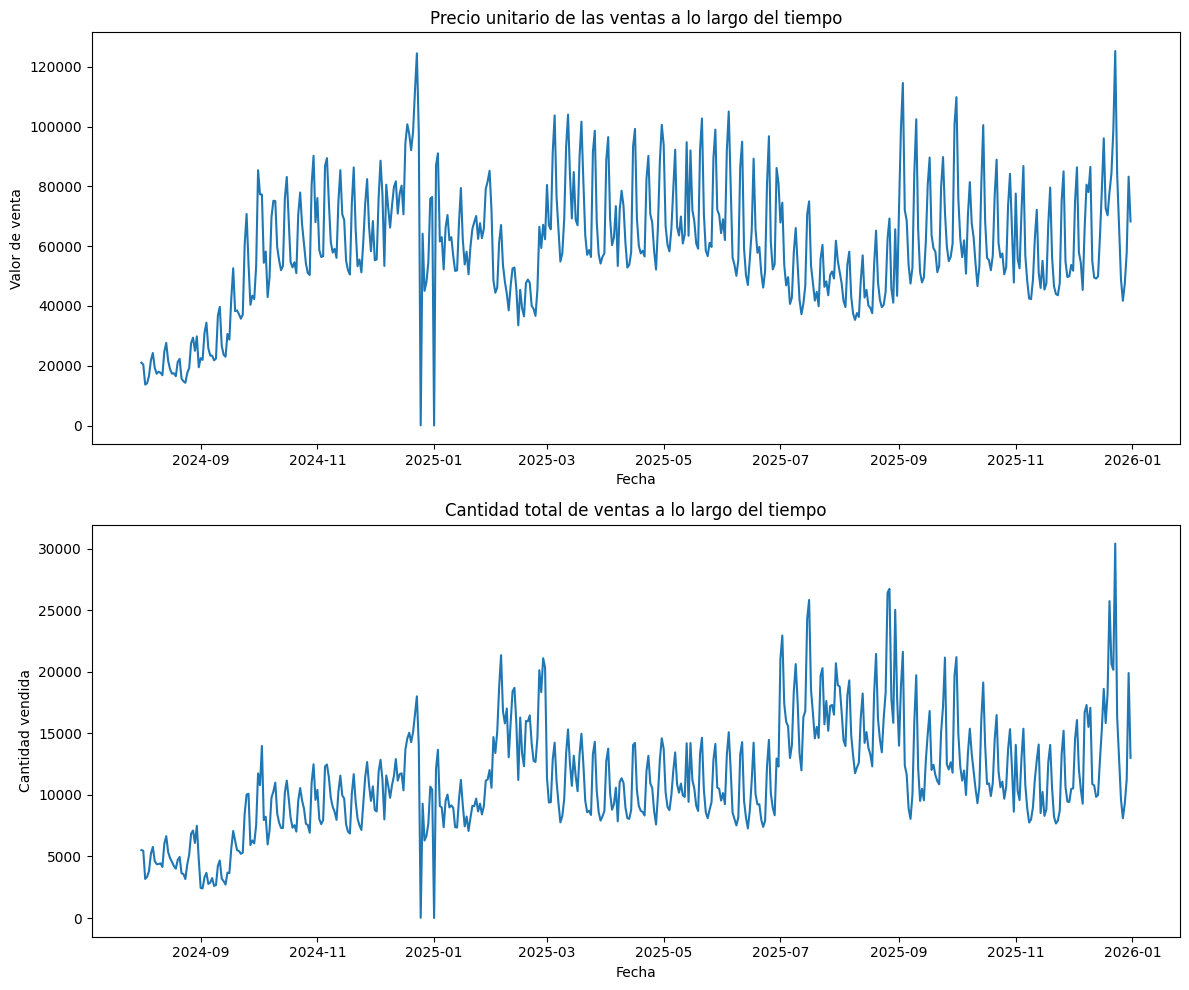

In [21]:
# Grafico de serie temporal de vecantidad   registradas sobre los  registros temporales de las tiendas de forma general
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

axes[0].plot(sales_over_time.index, sales_over_time['Price'])
axes[0].set_title('Precio unitario de las ventas a lo largo del tiempo')
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Valor de venta')

axes[1].plot(sales_over_time.index, sales_over_time['Quantity'])
axes[1].set_title('Cantidad total de ventas a lo largo del tiempo')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Cantidad vendida')

plt.tight_layout()
plt.show()

Se observan cambios  estructuirales  sobre  la cantidad vendida, esto evidenciando  picos  sobre periodos  que evidencian un automento de las cantidades vendidas de los productos. Por otro lado, los precios  presentaron una variación significativa  en el transcurso del periodo en analisis,  se  observa que  en enero del 2025, los precios  tuvieron un cambio a la baja de  forma drastica , afectando directamente en la cantidad vendida en el mismo prediodo.  evaluar  si depronto  fueron procesos  de promoción sobre los precios  de cero.

Analizar  el agrupado del valor total  sobre las ventas  generales de las tiendas 


In [27]:
data['Revenue'] = data.Quantity*data.Price
# analiziz  previo de  cantidades y precios  totales  sobre  las fechas registradas, esto permitira  identificar  picos generales  sobre las fechas
ventas_por_producto = data.groupby(['StoreID', 'ProductName'])[['Quantity', 'Revenue']].sum().sort_values(by='Revenue', ascending=False)

ventas_por_producto

Quantity      Revenue
StoreID      ProductName                                                    
a15ff6df5d40 Chicken milanese and Peppercorns White   164164.60  1204693.100
d7ab0c2de72b Pasta and Beans and Tandoori Masala      170277.85   987199.825
09664c25b8aa Chicken milanese and Peppercorns White   117484.35   915481.760
             Pasta and Beans and Tandoori Masala      150955.65   865609.990
a15ff6df5d40 Pasta and Beans and Tandoori Masala      149347.70   862708.325
...                                                         ...          ...
9961580664a2 Risotto with seafood and Chilli Crushed     437.00     2617.000
1b60d59e44b6 Chicken Fajitas and Fenugreek Leaf          193.00     2444.000
42f553fc34d8 Chilli con carne and Balti Stir Fry Mix     167.00     1990.000
17377e60b2ce Pasta Carbonara and Dhansak Spice Mix       179.40     1758.070
14bce06b5959 Chicken Fajitas and Onion Seed              102.00      306.000

[147 rows x 2 columns]

In [ ]:
total_pdv = data['StoreID'].nunique()

# Agrupar para saber en cuántos puntos de  ventas se vendió cada producto
productos_por_pdv = data.groupby('ProductName')['StoreID'].nunique()

# Filtrar productos vendidos en al menos el 40% de los puntos de  ventas registrados
productos_80_pdv = productos_por_pdv[productos_por_pdv >= 0.4 * total_pdv].index.tolist()

productos_80_pdv

['Chicken milanese and Peppercorns White',
 'Pasta and Beans and Tandoori Masala']

In [ ]:
# chequear  los productos más vendidos
productos_por_pdv.sort_values(ascending=False)

ProductName
Pasta and Beans and Tandoori Masala            46
Chicken milanese and Peppercorns White         42
Pork belly buns and BBQ Seasoning              23
Chilli con carne and Cloves Ground              9
Chilli con carne and Balti Stir Fry Mix         5
Chicken Fajitas and Onion Seed                  4
Chicken wings and Steak Seasoning               3
Chicken Fajitas and Fenugreek Leaf              3
Fish and chips and Poudre de Colombo            2
Meatballs with sauce and Mustard Seed White     2
Chilli con carne and Mace Whole                 2
Barbecue Ribs and Pickling Spice                1
Lasagne and Rose Baie                           1
Pasta Carbonara and Dhansak Spice Mix           1
Mushroom Risotto and Rosemary                   1
Risotto with seafood and Chilli Crushed         1
Salmon nigiri and Galangal Ground               1
Name: StoreID, dtype: int64

Realizar analisis de tendencias  en series temporales,  con el objetivo de descubirir patrones esenciales sobre el comportamiento de las ventas y precios  durante  el periodo de analisis